Question 1:

In [1]:
# Importing modules
from scipy.stats import poisson
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#function for tossing a coin

def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):
    
    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))
    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))
    index_ge1 = np.less_equal(observation, bernoulliParam_p)   
    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]
    while (repeatIndex < numRepeatsOfExp):
        observation[repeatIndex,:] = randomNumGen.random((1, numTrialsInAnExp))
        index_ge1 = np.less_equal(observation[repeatIndex,:], bernoulliParam_p)
        observation[repeatIndex,index_ge1] = profitLoss[0]
        observation[repeatIndex, np.invert(index_ge1)] = profitLoss[1]
        repeatIndex = repeatIndex + 1
    return observation


Part a

In [3]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 1
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])

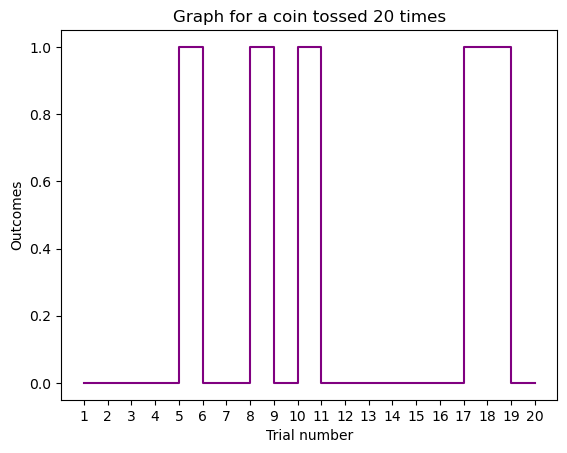

In [4]:
x=observation
y=np.array([i for i in range(1,21)])
plt.xlabel("Trial number")
plt.xticks([i for i in range(1,21)])
plt.ylabel("Outcomes")
plt.title("Graph for a coin tossed 20 times")
# Step used as given in the question
plt.step(y,x[0], where='pre',data=None,color="purple")
plt.show()

Observation: In this step function, there is a jump everytime the outcome of the experiment is 1 and it falls down to 0 when the outcome of the experiment is 0.

Part b

In [5]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 5
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])

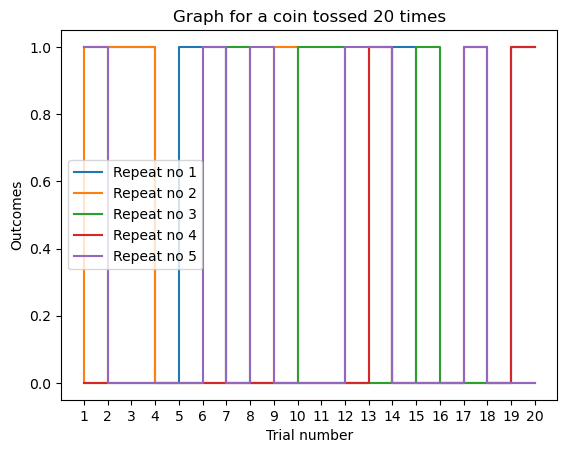

In [6]:
x=observation
fig,a=plt.subplots()
for i in range(1,v_numRepeatsOfExp+1):
    a.step(y,x[i-1], where='pre',data=None,label=f"Repeat no {i}")
a.legend()
plt.xlabel("Trial number")
plt.ylabel("Outcomes")
plt.xticks([i for i in range(1,21)])
plt.title("Graph for a coin tossed 20 times")
plt.show()

Observation: The graph illustrates the outcome of part A if the same experiment is repeated 5 times.

Part c

In [7]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 100
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])

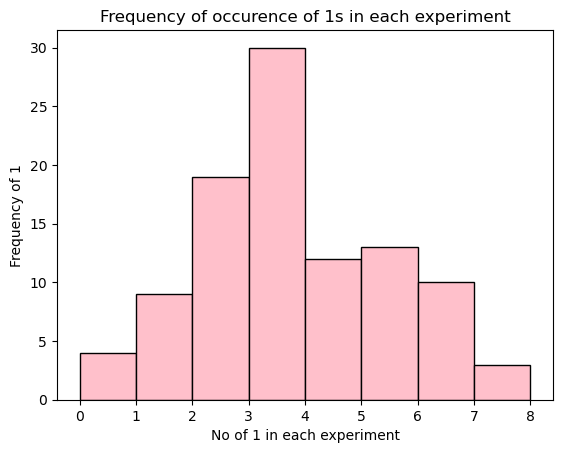

In [8]:
no_of_ones=[]
for i in observation:
    no_of_ones.append(list(i).count(1))
d={}
for i in no_of_ones:
    if i in d:
        d[i]+=1
    else:
        d[i]=1

x=list(d.keys())
y=list(d.values())
plt.hist(x, weights=y,bins=[i - 0.5 for i in range(1, 10)],align='left',color="pink",edgecolor="black")
plt.xlabel('No of 1 in each experiment')
plt.ylabel('Frequency of 1')
plt.title('Frequency of occurence of 1s in each experiment')
plt.show()

Observation: The above histogram represents a binomial PMF with n=20 and p=0.2. The maximum value on y-axis represents the maximum frequency of 1s in a trial repeated 100 times. In the above graph, there are 30 experiments where the frequency of 1 in a trial is 4, which is also the expected value of the graph, which can further be verified by manually calculating the expected value by the formula n x p = 20 x 0.2 = 4.

Part d

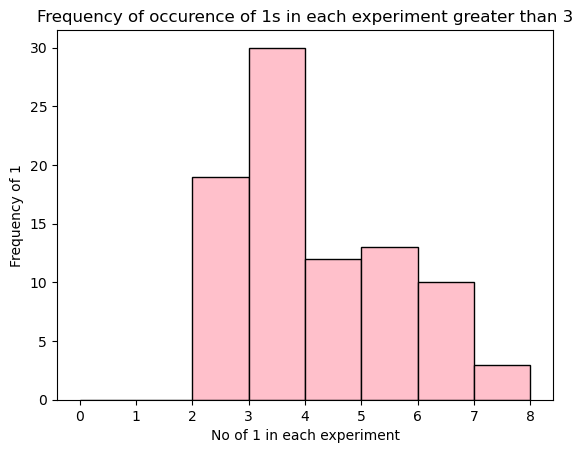

In [9]:
greater_than_3=[]
j=0
for i in no_of_ones:
    if i>=3:
        greater_than_3.append([j+1,i])
    j+=1
d={}
for i in greater_than_3:
    if i[1] in d:
        d[i[1]]+=1
    else:
        d[i[1]]=1
x=list(d.keys())
y=list(d.values())
plt.hist(x, weights=y,bins=[i - 0.5 for i in range(1, 10)],align='left',color="pink",edgecolor="black")
plt.xlabel('No of 1 in each experiment')
plt.ylabel('Frequency of 1')
plt.title('Frequency of occurence of 1s in each experiment greater than 3')
plt.show() 


Observation: The above histogram approximate a binomial PMF with parameters n=20 and p=0.2 but only for the subset of sequences that sum to atleast 3. Here we have effectively truncated the binomial distribution with fewer than 3 counts of 1(s).

Question 2:

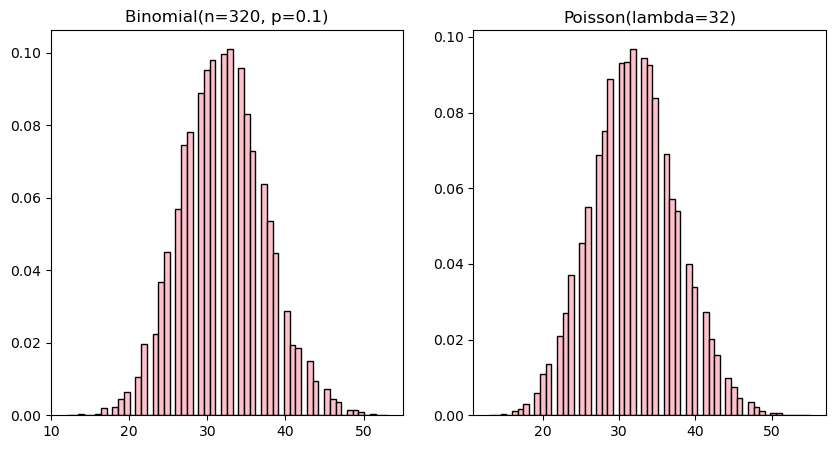

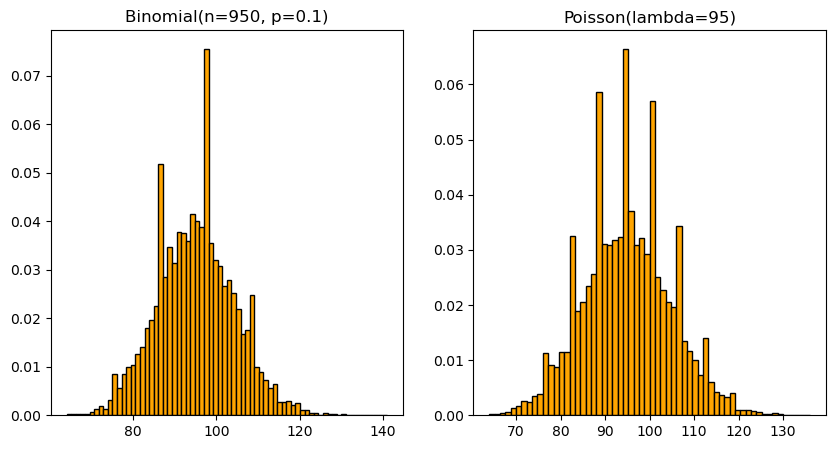

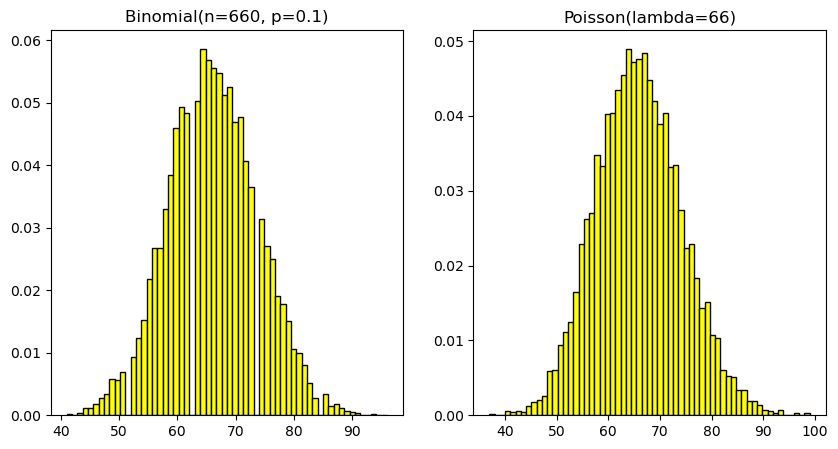

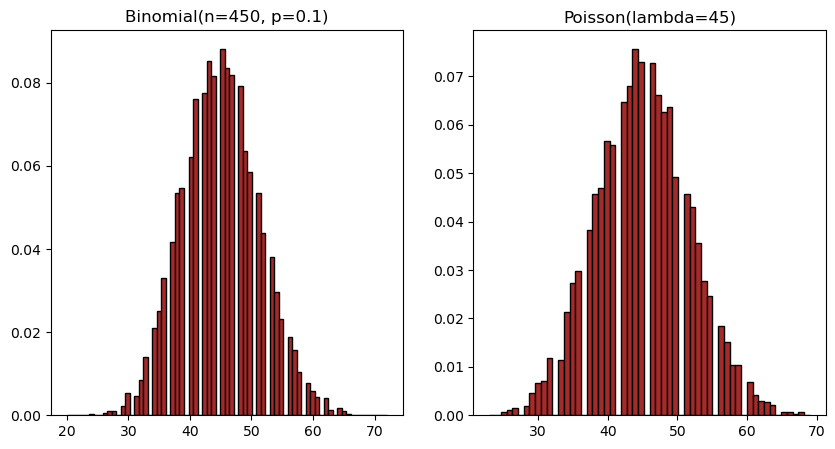

In [16]:
# Randomly selecting alpha values from the given range
alpha_values = list(map(int,np.random.uniform(low=0, high=100, size=4)))

num_experiments = 10000
colors=["pink","orange","yellow","brown"]
j=0

for alpha in alpha_values:
    n=10*alpha
    # n*p=alpha
    p = alpha/n 
    binom_samples = np.random.binomial(n=n, p=p, size=num_experiments)
    poisson_samples = np.random.poisson(lam=alpha, size=num_experiments)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].hist(binom_samples, bins='auto', density=True,color=colors[j],edgecolor="black")
    ax[0].set_title(f"Binomial(n={n}, p={p})")
    ax[1].hist(poisson_samples, bins='auto', density=True,color=colors[j],edgecolor="black")
    ax[1].set_title(f"Poisson(lambda={alpha})")
    j+=1
    plt.show()


Observation: For large enough number of experiments (say 10000), the poisson distribution can be derived from a binomial (n,p) in the limit as n -> infinity with n x p = alpha. In the above code, n and p are set such that n is large enough and p comes out to be 0.1 in each case. Thus, the binomial and poisson distribution looks almost similar.

Question 3:

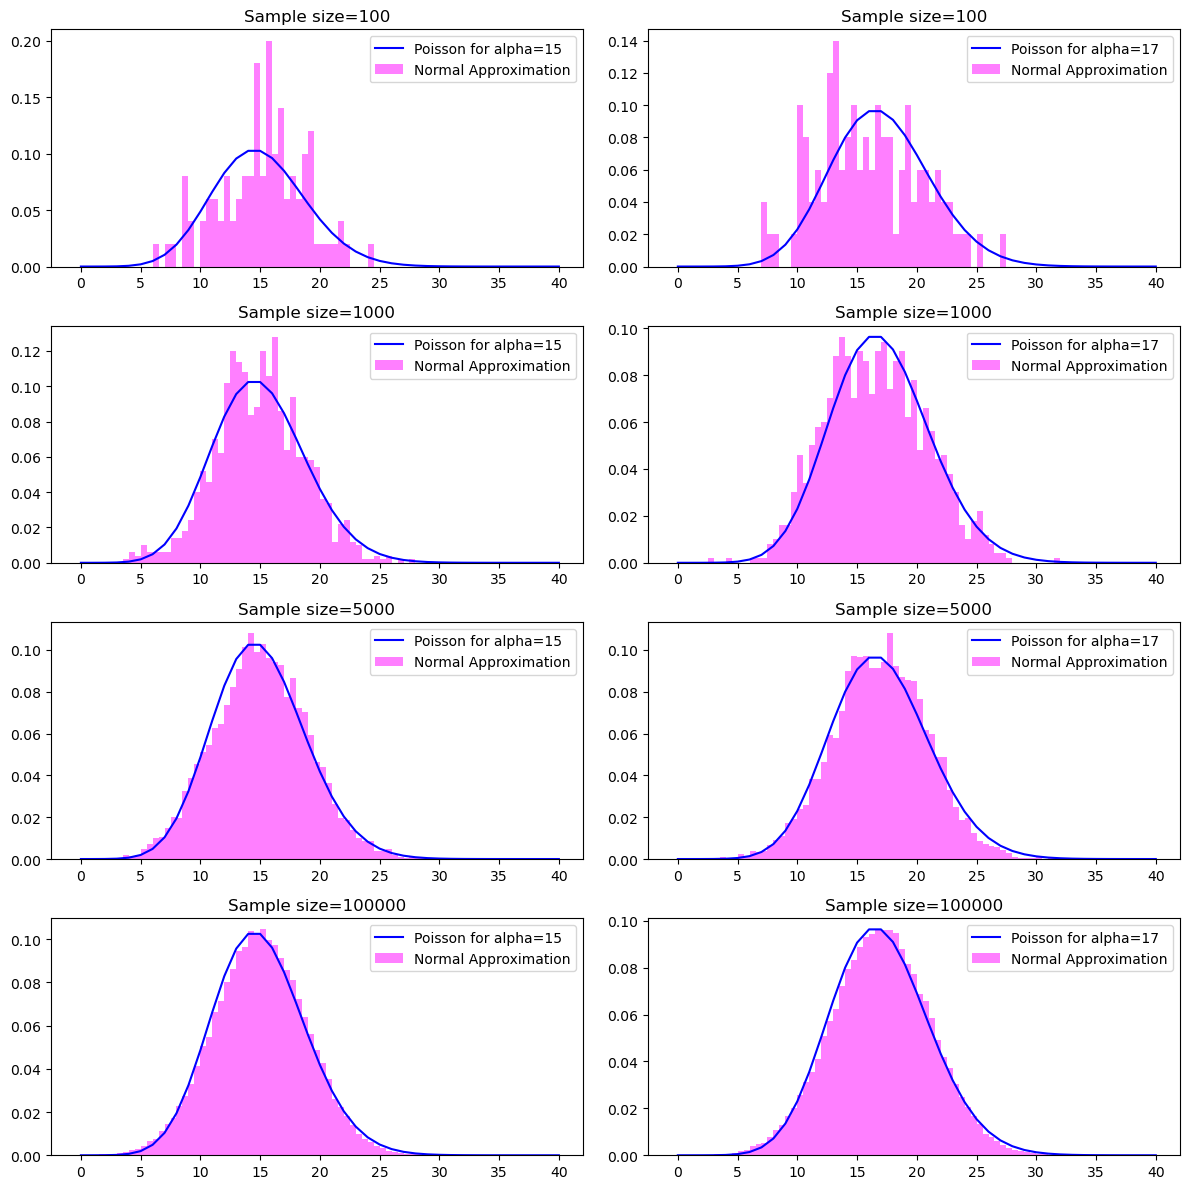

In [11]:
# Randomly selecting alpha values from the given range
alpha_values = list(map(int, np.random.uniform(low=1, high=20, size=2)))
sample_sizes = [100, 1000, 5000, 100000]

'''lambda = alpha*time
Assuming time = 1 unit, we get
lambda = alpha'''

fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()

for i, size in enumerate(sample_sizes):
    for j, lambda_val in enumerate(alpha_values):
        poisson_sample = poisson(lambda_val).rvs(size=size)
        sample_mean = np.mean(poisson_sample)
        sample_std = np.std(poisson_sample)
        norm_approx = np.random.normal(sample_mean, sample_std, size=size)
        x = np.arange(0, 41)
        axs[i*2+j].plot(x, poisson(lambda_val).pmf(x), 'bo-', ms=0, label=f'Poisson for alpha={lambda_val}')
        axs[i*2+j].hist(norm_approx, density=True, bins=np.arange(-0.5, 40.5, 0.5), alpha=0.5, label='Normal Approximation', color="magenta")
        axs[i*2+j].legend()
        axs[i*2+j].set_title(f"Sample size={size}")

plt.tight_layout()
plt.show()



Observation: The graphs illustrate that as we increase the number of trials (for example [100,1000,5000,100000]), the histogram converges more and more to a bell-shaped curve (proving central limit theorem) and it clusters about its mean/expected value (proving law of large numbers).